## Extra Trees
In this file, Extra Trees model is fit by tuning different hyperparameters based on F_{1.5} score: Criterion for splitting, number of trees, minimum number of samples to split, and maximum number of features for choosing to split.<br>
We will look at the *slopes* of precision and recall across different hyperparameters to see its influence rather than their face-values since the cut-off probability is set to 0.5 for the tuning process before deciding the threshold probability.<br>
Also, by comparing the fit to the training set vs. validation set, it is easy to see how trees tend to overfit. Lastly, the cut-off probability is decided by the F score.

Import the modules

In [1]:
from sklearn.ensemble import ExtraTreesClassifier
from ipynb.fs.full.helper_functions import * # Custom function to plot the results
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

Import the imputed dataset

In [2]:
X_train, X_val, y_train, y_val = pd.read_pickle('data/imp_train.pkl'), pd.read_pickle('data/imp_val.pkl'), pd.read_pickle('data/y_train.pkl'), pd.read_pickle('data/y_val.pkl')

### Hyperparameter tuning
1. Criterion = {“gini”, “entropy”}<br>
2. min_samples_split from 2 to 25(the minimum number of samples required to split an internal node)<br>
3. n_estimators from 5 to 100(the number of trees)<br>
4. max_features from 8 to 40(the maximum number of features to choose from when splitting)
- Remark: Just like Random Forest, both maximum number of trees and number of trees plateaus after a small number and only minimum-samples-to-split has a negative effect to the precision. It seems that tree algorithms are sensitive to minimum-samples-to-split.

#### 1. Criterion

Criterion = ***Gini***
with 10 estimators, 20 min_samples_split, sqrt(# of features) max_features<br>
- F score is .96 in the training set, but .58 in the evaluation set. This is strongly overfit.

In [3]:
extra_trees = ExtraTreesClassifier(random_state = 10,
                                   class_weight = {0: 1, 1: 27},
                                   bootstrap = False,
                                   criterion = 'gini',
                                   n_estimators = 10,
                                   min_samples_split = 20,
                                   max_features = "sqrt")

extra_trees.fit(X_train, y_train)

ExtraTreesClassifier(class_weight={0: 1, 1: 27}, max_features='sqrt',
                     min_samples_split=20, n_estimators=10, random_state=10)

Fit to the training set

Best Fbeta(1.5) score  0.96236 at prob decision threshold >=  0.68973


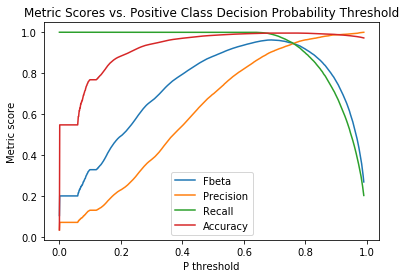

In [4]:
# Fit to the training set
y_probs = extra_trees.predict_proba(X_train)
precs, recs, fbetas, acc_scores = plot_fbeta_recall_precision_acc(y_probs[:,1], y_train)

Fit to the validation set

Best Fbeta(1.5) score  0.58408 at prob decision threshold >=  0.54604


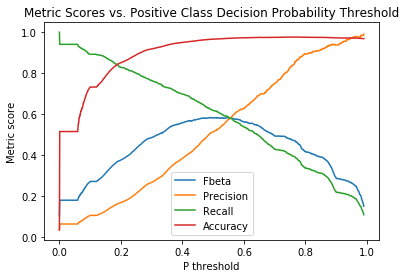

In [5]:
# Fit to the validation set
y_probs = extra_trees.predict_proba(X_val)
precs, recs, fbetas, acc_scores = plot_fbeta_recall_precision_acc(y_probs[:,1], y_val)

Criterion = ***Entropy***
with 10 estimators, 20 min_samples_split, sqrt(# of features) max_features<br>
- Slightly better F score(.60) in validation set than Gini(.58) and slighly as less overfitting.

In [6]:
extra_trees = ExtraTreesClassifier(random_state = 10,
                                   class_weight = {0: 1, 1: 27},
                                   bootstrap = False,
                                   criterion = 'entropy',
                                   n_estimators = 10,
                                   min_samples_split = 20,
                                   max_features = "sqrt")

extra_trees.fit(X_train, y_train)

ExtraTreesClassifier(class_weight={0: 1, 1: 27}, criterion='entropy',
                     max_features='sqrt', min_samples_split=20, n_estimators=10,
                     random_state=10)

Fit to the training set

Best Fbeta(1.5) score  0.96388 at prob decision threshold >=  0.68676


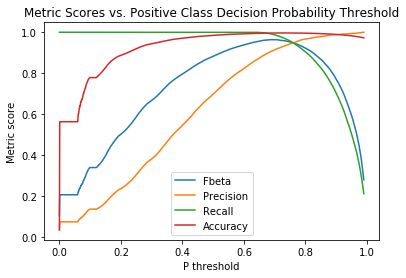

In [7]:
# Fit to the training set
y_probs = extra_trees.predict_proba(X_train)
precs, recs, fbetas, acc_scores = plot_fbeta_recall_precision_acc(y_probs[:,1], y_train)

Fit to the validation set

Best Fbeta(1.5) score  0.60345 at prob decision threshold >=  0.52721


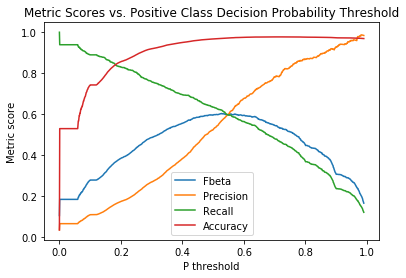

In [8]:
# Fit to the validation set
y_probs = extra_trees.predict_proba(X_val)
precs, recs, fbetas, acc_scores = plot_fbeta_recall_precision_acc(y_probs[:,1], y_val)

#### 2. Trying different min_samples_split from 2 to 25
- Based on the results from validation set, 16 minimum number of samples to split seems to be good.

In [9]:
# Read the saved scores lists
scores_train_min = pd.read_pickle('extra_trees/scores_train_min_samples_split.pkl')
scores_val_min = pd.read_pickle('extra_trees/scores_val_min_samples_split.pkl')

In [ ]:
scores_train_min, scores_val_min = [], [] 
min_samples_split_list = np.arange(2, 26)

for min_samples_split in min_samples_split_list:
    print(f"min_samples_split = {min_samples_split}")    
    
    extra_trees = ExtraTreesClassifier(random_state = 10,
                                       class_weight = {0: 1, 1: 27},
                                       bootstrap = False,
                                       criterion = 'entropy',
                                       n_estimators = 10,
                                       min_samples_split = min_samples_split,
                                       max_features = 'sqrt')
    
    _, scores_train_min, scores_val_min = extra_trees_result(extra_trees, X_train, y_train, X_val, y_val, scores_train_min, scores_val_min)

Fit to the training set
- min_samples_split doesn't seem to affect recall. Only precision will drop quite drastically as the min_samples_split increases. 

Best Fbeta(1.5) score  1.00000 at min samples split = 2


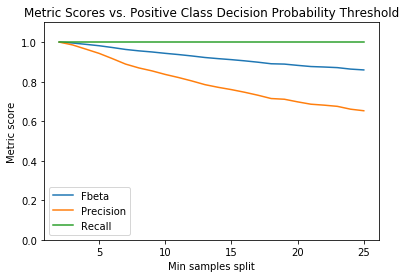

In [10]:
# Fit to the training set
plot_metric_min_samples_split(min_samples_split_list, scores_train_min)

Fit to the validation set
- As seen in the training set, precision drops even more drastically in unseen data. Min_samples_split has a direct effect on the precision probably because every tree in Extra Trees uses the same entire dataset, so the precision relies more heavily on this hyperparameter than Random Forest does.

Best Fbeta(1.5) score  0.60320 at min samples split = 16


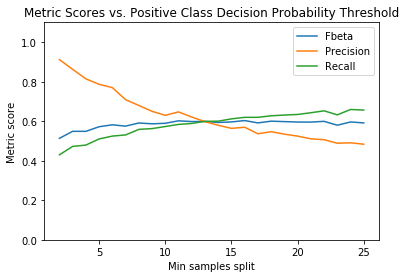

In [11]:
# Fit to the validation set
plot_metric_min_samples_split(min_samples_split_list, scores_val_min)

#### 3. Trying different n_estimators(number of trees) from 5 to 100
The performance plateaus after about 30 trees. <br>
24 trees are chosen as the best F score.

In [12]:
# Read the saved scores lists
scores_train_n_estimators = pd.read_pickle('extra_trees/scores_train_n_estimators.pkl')
scores_val_n_estimators = pd.read_pickle('extra_trees/scores_val_n_estimators.pkl')

In [ ]:
n_estimators_list = np.arange(5, 101)

for n_estimators in n_estimators_list:
    print(f"n_estimators = {n_estimators}")    
    
    extra_trees = ExtraTreesClassifier(random_state = 10,
                                       class_weight = {0: 1, 1: 27},
                                       bootstrap = False,
                                       criterion = 'entropy',
                                       n_estimators = n_estimators,
                                       min_samples_split = 16,
                                       max_features = "sqrt")
    
    _, scores_train_n_estimators, scores_val_n_estimators = extra_trees_result(extra_trees, X_train, y_train, X_val, y_val, scores_train_n_estimators, scores_val_n_estimators)

Fit to the training set
- It is noticeable that the number of trees doesn't affect neither precision nor recall after about 20 trees. It is probably because every tree uses the same dataset which makes the trees overfit even with a small number of trees.

Best Fbeta(1.5) score  0.92992 at n_estimators = 78


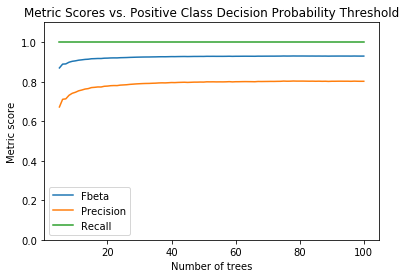

In [13]:
# Fit to the training set
plot_metric_n_estimators(n_estimators_list, scores_train_n_estimators)

Fit to the validation set
- Same result as training set.

Best Fbeta(1.5) score  0.63227 at n_estimators = 24


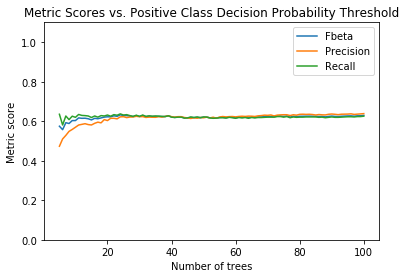

In [14]:
# Fit to the validation set
plot_metric_n_estimators(n_estimators_list, scores_val_n_estimators)

#### 4. Trying different maximum number of features(candidates for splitting) from 8 to 40
High number of candidate features tend to overfit by making similar trees which explains why almost the maximum parameter(39 features) is chosen in this line-search. The squared root of maximum features(about 20) seems to be good enough to prevent overfitting while maintaining about the same F score.

In [15]:
# Read the saved scores lists
scores_train_max_features = pd.read_pickle('extra_trees/scores_train_max_features.pkl')
scores_val_max_features = pd.read_pickle('extra_trees/scores_val_max_features.pkl')

In [ ]:
for max_features in range(8, 41):
    print(f"max_features = {max_features}")    
    
    extra_trees = ExtraTreesClassifier(random_state = 10,
                                       class_weight = {0: 1, 1: 27},
                                       bootstrap = False,
                                       criterion = 'entropy',
                                       n_estimators = 24,
                                       min_samples_split = 16,
                                       max_features = max_features)
    
    _, scores_train_n_estimators, scores_val_n_estimators = extra_trees_result(extra_trees, X_train, y_train, X_val, y_val, scores_train_max_features, scores_val_max_features)

Fit to the training set
- Maximum number of features doesn't seem to affect recall and has a very weak positive correlation with precision. 

Best Fbeta(1.5) score  0.93292 at max features = 39


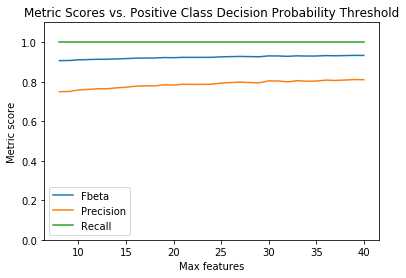

In [16]:
# Fit to the training set
plot_metric_max_features(range(8, 41), scores_train_max_features)

Fit to the validation set

Best Fbeta(1.5) score  0.63749 at max features = 39


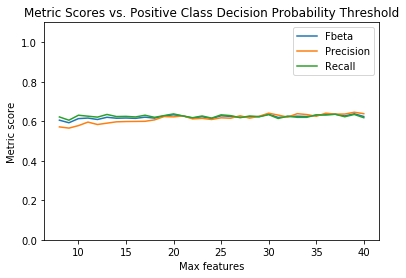

In [17]:
# Fit to the validation set
plot_metric_max_features(range(8, 41), scores_val_max_features)

### Final Model of Extra Trees is...

In [18]:
extra_trees = ExtraTreesClassifier(random_state = 10,
                                   class_weight = {0: 1, 1: 27},
                                   bootstrap = False,
                                   criterion = 'entropy',
                                   n_estimators = 24,
                                   min_samples_split = 16,
                                   max_features = "sqrt")
extra_trees.fit(X_train, y_train)

ExtraTreesClassifier(class_weight={0: 1, 1: 27}, criterion='entropy',
                     max_features='sqrt', min_samples_split=16, n_estimators=24,
                     random_state=10)

Fit to the validation set

Best Fbeta(1.5) score  0.63354 at prob decision threshold >=  0.49252


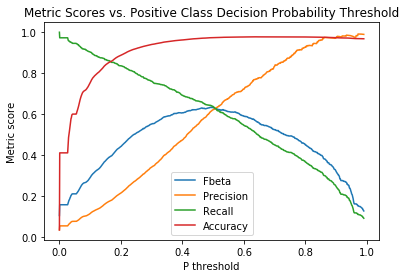

In [19]:
# Fit to the validation set
y_probs = extra_trees.predict_proba(X_val)[:, 1]
precs, recs, fbetas, acc_scores = plot_fbeta_recall_precision_acc(y_probs, y_val)

Fit to the training set to check overfit.
- It is still overfit after the tuning.

Best Fbeta(1.5) score  0.98449 at prob decision threshold >=  0.72243


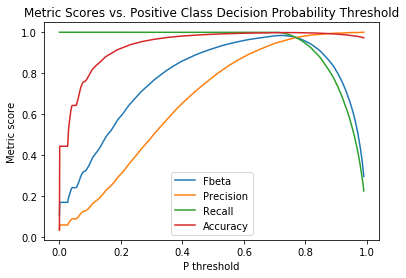

In [20]:
# Fit to the training set
y_probs_train = extra_trees.predict_proba(X_train)[:, 1]
precs, recs, fbetas, acc_scores = plot_fbeta_recall_precision_acc(y_probs_train, y_train)

**Evaluation on validation set**

In [21]:
threshold = 0.49252

In [22]:
pred_val = (y_probs >= threshold).astype(int)
prec, rec, fbeta, _ = precision_recall_fscore_support(y_val, pred_val, beta = 1.5, average = 'binary')
print(f"Val set: Precision = {round(prec, 5)}, Recall = {round(rec, 5)}, F_1.5 = {round(fbeta, 5)}\n")

Val set: Precision = 0.61368, Recall = 0.64279, F_1.5 = 0.63354



**Feature Importance**

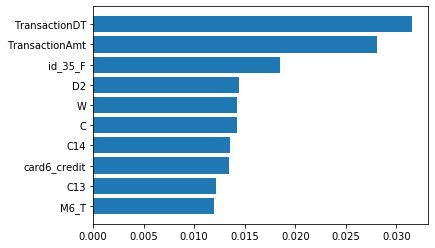

In [23]:
index = np.argsort(extra_trees.feature_importances_)
feature_importances = extra_trees.feature_importances_
plt.barh(range(10), feature_importances[index[-10:]])
plt.yticks(range(10), X_train.columns[index[-10:]]);

The 10 important features have a very weak correlation with the target.

In [24]:
X_train.loc[:, X_train.columns[index[-1:-10:-1]].values].corrwith(y_train)

TransactionDT     0.000583
id_35_F           0.000479
TransactionAmt    0.001607
card6_credit     -0.000801
C                 0.000720
D2                0.000851
C14              -0.000736
M6_T              0.000890
W                 0.001121
dtype: float64

*Remarks:*<br>
*Extra Trees is **more overfit** than Random Forest Classifier with similar hyperparameters. Using the entire data for each tree may be contributing to overfitting too much although it selects features at random.*